# Applied Deep Learning - Individual Assigment 

Matheus Maciel - 17003295

# Importing libraries

In [ ]:
# data handling & manipulation 
import pandas as pd 
import numpy as np 

# visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns

# machine learning & neural networks 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense, SimpleRNN, BatchNormalization, LSTM, Conv1D, Embedding, GRU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.metrics import mean_squared_error
from keras import Input
from tensorflow.keras import backend as K


# Question 1 

Create a **recurrent neural network** in TensorFlow to predict the operating mode of a wind turbine based on the two time series from the sensors. Before any implementation, carefully consider what type of approach: 
- sequence-to-vector
- sequence-to-sequence
- encoder-decoder
   
is most sensible here and how you need to manipulate the data, given that you have two different time series for each observation.

#### Data exploration 

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading data
import pickle
try:
  with open ('time_series_1.pickle', 'rb') as handle:
    time_series_1 = pickle.load (handle)
    with open ('time_series_2.pickle','rb') as handle:
      time_series_2 = pickle.load(handle)
      with open("y.pickle", 'rb') as handle:
        y = pickle.load(handle)
except:
  with open ('/content/drive/MyDrive/CASS/time_series_1.pickle', 'rb') as handle:
    time_series_1 = pickle.load (handle)
    with open ('/content/drive/MyDrive/CASS/time_series_2.pickle','rb') as handle:
      time_series_2 = pickle.load(handle)
      with open("/content/drive/MyDrive/CASS/y.pickle", 'rb') as handle:
        y = pickle.load(handle)


In [ ]:
# Inspecting shape of data 
print(time_series_1.shape)       # Pitch angle   
print(time_series_2.shape)       # Generator torque 
print(y.shape)

(4000, 5000)
(4000, 5000)
(4000,)


In [ ]:
# plot time series 1 (pitch angle)
"""plt.figure(figsize=(12,9))
for x in time_series_1:
    plt.plot(x)    """

'plt.figure(figsize=(12,9))\nfor x in time_series_1:\n    plt.plot(x)    '

In [ ]:
# plot time series 2 (generator torque)
"""plt.figure(figsize=(12,9))
for x in time_series_2:
    plt.plot(x)    """

'plt.figure(figsize=(12,9))\nfor x in time_series_2:\n    plt.plot(x)    '

In [ ]:
data = np.dstack((time_series_1,time_series_2))
print(data.shape)
print(y.shape)

(4000, 5000, 2)
(4000,)


[[   0. 1000.]
 [   1. 1000.]
 [   2. 1000.]
 [   3. 1000.]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


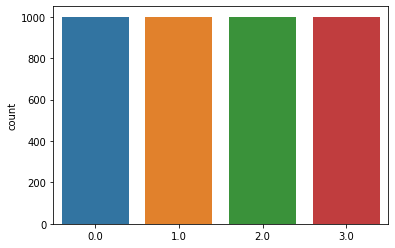

In [ ]:
# inspect distribution of classes 
sns.countplot(y)
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

- Balanced data set 

#### Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler

#For loop for scaling 3d array with sklearn 
scalers = {}
for i in range(data.shape[1]):
    scalers[i] = StandardScaler()
    data[:, i, :] = scalers[i].fit_transform(data[:, i, :]) 
    
data[1]

array([[  1, 254],
       [  2,   1],
       [  1, 255],
       ...,
       [  0,   1],
       [  0,   1],
       [  0,   1]], dtype=uint8)

#### Train Test Split

In [ ]:
# train test split 
X = data
y 

from sklearn.model_selection import train_test_split
X_train, X_other, y_train, y_other = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_other,y_other, test_size=0.5)

In [ ]:
#printing shapes of each set
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(2800, 5000, 2)
(600, 5000, 2)
(600, 5000, 2)


### Build Model

In [ ]:
num_classes=len(np.unique(y_train))

#### Simple RNN

In [ ]:
# clean session 
tf.keras.backend.clear_session()

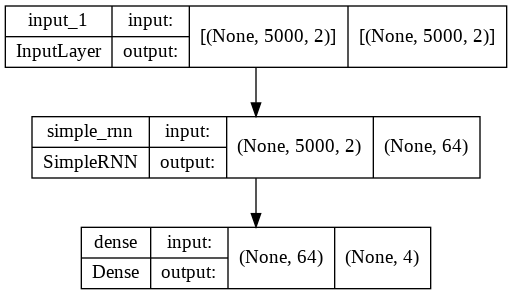

In [ ]:

def make_model(input_shape):
    
    input_layer = keras.layers.Input(input_shape)
    
    sim_rnn = keras.Sequential()
    
    sim_rnn = keras.layers.SimpleRNN(64)(input_layer)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(sim_rnn)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


simple_rnn = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(simple_rnn, show_shapes=True)

In [ ]:
'''
simple_rnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
simple_rnn_history = simple_rnn.fit(
    X_train,
    y_train,
    #batch_size=batch_size,
    epochs=20,
    #callbacks=callbacks,
    validation_data=(X_valid, y_valid),
)

the Simple RNN performs poorly compared to other models in the notebook, 
achieving only a mediocre level of accuracy in a much longer time. Hence,
it is left commented, with only its structure being displayed above.
'''

'\nsimple_rnn.compile(\n    optimizer="adam",\n    loss="sparse_categorical_crossentropy",\n    metrics=["sparse_categorical_accuracy"],\n)\nsimple_rnn_history = simple_rnn.fit(\n    X_train,\n    y_train,\n    #batch_size=batch_size,\n    epochs=20,\n    #callbacks=callbacks,\n    validation_data=(X_valid, y_valid),\n)\n\nthe Simple RNN performs poorly compared to other models in the notebook, \nachieving only a mediocre level of accuracy in a much longer time. Hence,\nit is left commented, with only its structure being displayed above.\n'

In [ ]:
#simple_rnn_metrics = simple_rnn.evaluate(X_test, y_test)

In [ ]:
#simple_rnn_val_loss, simple_rnn_val_acc = simple_rnn_metrics
#print("Model's loss (error) is:", simple_rnn_val_loss)
#print("Model's accuracy is: ",simple_rnn_val_acc)


In [ ]:
# Visualising Training and Validation Loss
#plt.plot(simple_rnn_history.history['loss'],label='train')
#plt.plot(simple_rnn_history.history['val_loss'], label='valid')
#plt.legend(['Training', 'Validation'])
#plt.xlabel('Epochs')
#plt.show()


In [ ]:
# Visualising Training and Validation Accuracy
#plt.plot(simple_rnn_history.history['sparse_categorical_accuracy'])
#plt.plot(simple_rnn_history.history['val_sparse_categorical_accuracy'])
#plt.legend(['Training', 'Validation'])
#plt.title('Accuracy')
#plt.xlabel('Epochs')

#### LSTM

In [ ]:
# clean session 
tf.keras.backend.clear_session()

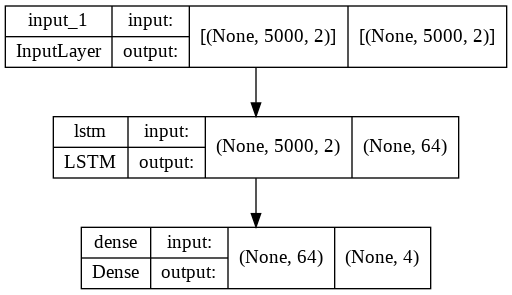

In [ ]:
def make_model(input_shape):
    
    input_layer = keras.layers.Input(input_shape)
    
    lstm1 = keras.Sequential()
    lstm1 = keras.layers.LSTM(64)(input_layer)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(lstm1)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


lstm_model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(lstm_model, show_shapes=True)

In [ ]:
lstm_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
lstm_history = lstm_model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_valid, y_valid),
)

Epoch 1/20
88/88 [==============================] - 152s 2s/step - loss: 1.3199 - sparse_categorical_accuracy: 0.3650 - val_loss: 1.2831 - val_sparse_categorical_accuracy: 0.3967
Epoch 2/20
86/88 [============================>.] - ETA: 3s - loss: 1.2600 - sparse_categorical_accuracy: 0.4124

In [ ]:
lstm_metrics = lstm_model.evaluate(X_test, y_test)


In [ ]:
lstm_val_loss, lstm_val_acc = lstm_metrics
print("Model's loss (error) is:", lstm_val_loss)
print("Model's accuracy is: ",lstm_val_acc)


In [ ]:
# Visualising Training and Validation Loss
plt.plot(lstm_history.history['loss'],label='train')
plt.plot(lstm_history.history['val_loss'], label='valid')
plt.legend(['Training', 'Validation'])
plt.xlabel('Epochs')
plt.show()

In [ ]:
# Visualising Training and Validation Accuracy
plt.plot(lstm_history.history['sparse_categorical_accuracy'])
plt.plot(lstm_history.history['val_sparse_categorical_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

#### Conv1D

In [ ]:
# clean session 
tf.keras.backend.clear_session()

In [ ]:
def make_model(input_shape):
    
    input_layer = keras.layers.Input(input_shape)
    
    conv_rnn = keras.Sequential()
    conv_rnn = keras.layers.Conv1D(64, kernel_size=3, padding="same")(input_layer)
    gap = keras.layers.GlobalAveragePooling1D()(conv_rnn)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


convd_model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(convd_model, show_shapes=True)

In [ ]:
convd_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
convd_history = convd_model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_valid, y_valid)
)

In [ ]:
convd_metrics = convd_model.evaluate(X_test, y_test)


In [ ]:
convd_val_loss, convd_val_acc = convd_metrics
print("Model's loss (error) is:", convd_val_loss)
print("Model's accuracy is: ",convd_val_acc)


In [ ]:

# Visualising Training and Validation Loss
plt.plot(convd_history.history['loss'],label='train')
plt.plot(convd_history.history['val_loss'], label='valid')
plt.legend(['Training', 'Validation'])
plt.xlabel('Epochs')
plt.show()


In [ ]:

## Visualising Training and Validation Accuracy
plt.plot(convd_history.history['sparse_categorical_accuracy'])
plt.plot(convd_history.history['val_sparse_categorical_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

#### GRU

In [ ]:
# clean session 
tf.keras.backend.clear_session()

In [ ]:

def make_model(input_shape):
    
    input_layer = keras.layers.Input(input_shape)
    
    gru_model = keras.Sequential()
    gru_model = keras.layers.GRU(64)(input_layer)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gru_model)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


gru_model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(gru_model, show_shapes=True)

In [ ]:
gru_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
gru_history = gru_model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_valid, y_valid),
)

In [ ]:
gru_metrics = gru_model.evaluate(X_test, y_test)

In [ ]:
gru_val_loss, gru_val_acc = gru_metrics
print("Model's loss (error) is:", gru_val_loss)
print("Model's accuracy is: ",gru_val_acc)

In [ ]:
# Visualising Training and Validation Loss
plt.plot(gru_history.history['loss'],label='train')
plt.plot(gru_history.history['val_loss'], label='valid')
plt.legend(['Training', 'Validation'])
plt.xlabel('Epochs')
plt.show()

## Visualising Training and Validation Accuracy
plt.plot(gru_history.history['sparse_categorical_accuracy'])
plt.plot(gru_history.history['val_sparse_categorical_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

### METRICS - Model Comparison 

In [ ]:
# Model performance visualisation 
from matplotlib import rcParams

rcParams['figure.figsize'] = (18,8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

#plt.plot(np.arange(1, 21), simple_rnn_history.history['sparse_categorical_accuracy'], label='Simple RNN')
plt.plot(np.arange(1, 21), gru_history.history['sparse_categorical_accuracy'], label='GRU')
plt.plot(np.arange(1, 21), lstm_history.history['sparse_categorical_accuracy'], label='LSTM')
plt.plot(np.arange(1, 21), convd_history.history['sparse_categorical_accuracy'], label='Conv1D')

plt.title('Accuracy evaluation', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

The **LSTM** Model shows the best performance in terms of accuracy across 20 Epochs compared to other models. 

All models at this stage were not adjusted for hyperparameters. Due to LSTM's performance, it will be the chosen model to be further optimised. 

### Optimisation and best LSTM Model

In [ ]:
# clean session 
tf.keras.backend.clear_session()

def make_model(input_shape):
    
    input_layer = keras.layers.Input(input_shape)
    
    best_lstm = keras.Sequential()
    best_lstm = keras.layers.LSTM(64, return_sequences=True)(input_layer)

    best_lstm = keras.layers.Dropout(rate=0.2) (best_lstm)

    best_lstm = keras.layers.BatchNormalization()(best_lstm)
    best_lstm = keras.layers.ReLU()(best_lstm)

    best_lstm2 = keras.layers.LSTM(32)(best_lstm)
    #best_lstm2 = keras.layers.BatchNormalization()(best_lstm2)
    #best_lstm2 = keras.layers.ReLU()(best_lstm2)

    #best_lstm3 = keras.layers.LSTM(64)(best_lstm2)
    #best_lstm3 = keras.layers.BatchNormalization()(best_lstm3)
    #best_lstm3 = keras.layers.ReLU()(best_lstm3)

    gap = keras.layers.GlobalAveragePooling1D()(best_lstm)
    #conv_rnn = keras.layers.Flatten()(conv_rnn)

    output_layer = keras.layers.Dense(num_classes, activation='softmax')(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


best_model = make_model(input_shape=X_train.shape[1:])
best_model.summary()
#keras.utils.plot_model(convd_model, show_shapes=True)

In [ ]:
best_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
best_model_history = best_model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_valid, y_valid),
)

In [ ]:
best_lstm_metrics = best_model.evaluate(X_test, y_test)
## model would benefit from running on further epochs

In [ ]:
best_lstm_val_loss, best_lstm_val_acc = best_lstm_metrics
print("Model's loss (error) is:", best_lstm_val_loss)
print("Model's accuracy is: ",best_lstm_val_acc)
# improved results from the original lstm

In [ ]:
# Visualising Training and Validation Loss
plt.plot(best_model_history.history['loss'],label='train')
plt.plot(best_model_history.history['val_loss'], label='valid')
plt.legend(['Training', 'Validation'])
plt.xlabel('Epochs')
plt.show()

In [ ]:
# Visualising Training and Validation Accuracy
plt.plot(best_model_history.history['sparse_categorical_accuracy'])
plt.plot(best_model_history.history['val_sparse_categorical_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

# Question 2

 In your own words, explain why the approach outlined here can help analyze time-series data and why it might outperform RNNs.

The paper describes the methodology that converts time-series data into a picture, with the goal of reducing the complexity of the dataset and thus, provide more accurate predictions/classification. 

RNNs are commonly used for such tasks. That is due to the fact its structure of feeding previous data into subsequent parts of the network allows it to interpret sequences with precision - when forecasting the time-series, for instance. In this case, however, the dataset's size and large number of different parameters in each turbine, difficults the detection of anomalies within the time-series. The CNN method is able to simplify the data whilst not abdicating of accuracy, since the image is still able to keep details of the data. Features such as the kernels which are able to analyse sequences in the pixels of the image, along with activation and dropout functions that preserve the most important features for the NN leads to a model that is able to interpret key parts of the data with less complexity.  

# Question 3

Convert the data for use with a CNN. In particular, following the approach outlined in Scenario 2 (section 5.3 of the paper) and summarized in Figure 18, convert the two time series corresponding to one wind turbine run into a single (100,100,1) array (i.e., a gray- scale image).


In [ ]:
# clean session 
tf.keras.backend.clear_session()

In [ ]:
# classes in the dataset
num_classes = 4 

# image dimensions 
img_rows, img_cols, img_channels = 100,50,1 

# Depending on the implementation, the underlying libraries might want the image 
# dimensions in different orders, check for it and reshape
if K.image_data_format() == 'channels_first':
    time_series_1_reshape = time_series_1.reshape(time_series_1.shape[0], img_channels, img_rows, img_cols)
    time_series_2_reshape = time_series_2.reshape(time_series_2.shape[0], img_channels, img_rows, img_cols)
    input_shape = (img_channels, img_rows, img_cols)
else:
    time_series_1_reshape = time_series_1.reshape(time_series_1.shape[0], img_rows, img_cols, img_channels)
    time_series_2_reshape = time_series_2.reshape(time_series_2.shape[0], img_rows, img_cols, img_channels)
    input_shape = (img_rows, img_cols, img_channels)

print("time_series_1_test shape:", time_series_1_reshape.shape)
print("time_series_2_test shape:", time_series_2_reshape.shape)
print("input shape:", input_shape)

In [ ]:
data_img = np.dstack((time_series_1_reshape,time_series_2_reshape))
data_img.shape

In [ ]:
# train test split 
X_cnn = data_img
y_cnn = y

from sklearn.model_selection import train_test_split
X_cnn_train, X_cnn_other, y_cnn_train, y_cnn_other = train_test_split(X_cnn,y_cnn, train_size=0.7)
X_cnn_valid, X_cnn_test, y_cnn_valid, y_cnn_test = train_test_split(X_cnn_other,y_cnn_other, test_size=0.5)

In [ ]:
plt.imshow(X_cnn_train[0], cmap='gray')

In [ ]:
# inspect shapes
train_test = X_cnn_train, X_cnn_other, y_cnn_train, y_cnn_other, X_cnn_valid, X_cnn_test, y_cnn_valid, y_cnn_test

for set in train_test: 
    print(set.shape)

# Question 4

In [ ]:
# scaling data
X_cnn_scaled_train = X_cnn_train / 255
X_cnn_scaled_test = X_cnn_test / 255
X_cnn_scaled_other = X_cnn_other / 255
X_cnn_scaled_valid = X_cnn_valid / 255

In [ ]:
# replicating cnn model

def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)
    
    cnn = keras.Sequential()
    cnn = keras.layers.Conv2D(32, kernel_size=(3,3), padding='valid') (input_layer)
    cnn = keras.layers.Dropout(rate=0.2) (cnn)
    cnn = keras.layers.Conv2D(16, kernel_size=(3,3), padding='valid') (cnn)
    cnn = keras.layers.ReLU() (cnn)
    max = keras.layers.MaxPooling2D(pool_size=(3,3)) (cnn) 
    cnn = keras.layers.Flatten()(cnn)
    output_layer = keras.layers.Dense(num_classes, activation="softmax")(cnn)
    
    return keras.models.Model(inputs=input_layer, outputs=output_layer)

cnn_model = make_model(input_shape=X_cnn_scaled_train.shape[1:])
keras.utils.plot_model(cnn_model, show_shapes=True)

In [ ]:
# compile & fit model
cnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
cnn_model_history = cnn_model.fit(
    X_cnn_scaled_train,
    y_cnn_train,
    epochs=20,
    validation_data=(X_cnn_scaled_valid, y_cnn_valid),
)

In [ ]:
cnn_metrics = cnn_model.evaluate(X_cnn_scaled_test, y_cnn_test)

In [ ]:
cnn_val_loss, cnn_val_acc = cnn_metrics
print("Model's loss (error) is:", cnn_val_loss)
print("Model's accuracy is: ",cnn_val_acc)

# question 5

In [ ]:
%%capture
from keras.models import Model
from keras.layers import Conv2D , Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D
from keras.layers import Concatenate, Add, ReLU, Lambda, Activation 

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from time import time

In [ ]:
# clean session 
tf.keras.backend.clear_session()

#### Using the structure of pre-trained architectures 

A great part of this project/assignment tasks are based on trial and error testing. 

The models however, can take time to be tested to check their full accuracy and trial/error adjustments can take long. For this reason, different models were tested across different devices and platforms (e.g a model runninng on colab, while a different was being ran on vs code, while a different one could be running on a separate colab in a different device.)

To include all variations in this single notebook would thus be complicated since it would be necessary to wait for all models and their trial/error variations to be fully completed to show the progress of each alteration. Hence, the following model is the result of the best result i could achieve, upon trialing  different approaches. 

In [ ]:
def mobilenet(input_shape, n_classes):
  
  def mobilenet_block(x, f, s=1):
    x = DepthwiseConv2D(3, strides=s, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(f, 1, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
    
    
  input = Input(input_shape)

  x = Conv2D(32, 3, strides=2, padding='same')(input)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  x = mobilenet_block(x, 64)
  x = mobilenet_block(x, 128, 2)
  x = mobilenet_block(x, 128)

  x = mobilenet_block(x, 256, 2)
  x = mobilenet_block(x, 256)

  x = mobilenet_block(x, 512, 2)
  for _ in range(5):
    x = mobilenet_block(x, 512)

  x = mobilenet_block(x, 1024, 2)
  x = mobilenet_block(x, 1024)
  
  x = GlobalAvgPool2D()(x)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

In [ ]:
mobilenet_model = mobilenet(X_cnn_scaled_train.shape[1:],num_classes)

In [ ]:
## ACC >80
mobilenet_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
mobilenet_model_history = mobilenet_model.fit(
    X_cnn_scaled_train,
    y_cnn_train,
    epochs=20,
    validation_data=(X_cnn_scaled_valid, y_cnn_valid),
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1)]   # callback early stop to prevent overfit
)

In [ ]:
mobilenet_metrics = mobilenet_model.evaluate(X_cnn_scaled_test, y_cnn_test)

mobilenet_val_loss, mobilenet_val_acc = mobilenet_metrics
print("Model's loss (error) is:", mobilenet_val_loss)
print("Model's accuracy is: ",mobilenet_val_acc)

# Question 6 

### Training model on combined train and validation set , evaluating on test 

In [ ]:
X_comb = np.concatenate((X_cnn_scaled_train,X_cnn_scaled_valid))
y_comb= np.concatenate((y_cnn_train,y_cnn_valid))

In [ ]:
print(X_comb.shape)
print(y_comb.shape)

In [ ]:
best_model_final = mobilenet_model.fit(
    X_comb,
    y_comb,
    epochs=20,
    callbacks=[keras.callbacks.EarlyStopping(monitor="loss", patience=50, verbose=1)]   # callback early stop to prevent overfit
)

In [ ]:
best_cnn_metrics = mobilenet_model.evaluate(X_cnn_scaled_test, y_cnn_test)

best_cnn_loss, best_cnn_val_acc = best_cnn_metrics
print("Model's loss (error) is:", best_cnn_loss)
print("Model's accuracy is: ",best_cnn_val_acc)

In [ ]:
# Save the entire model to a HDF5 file.
mobilenet_model.save('model_q6.h5')

My two best formulated models were an LSTM and the CNN utilising the MobileNET Structure. My choice for the MobileNet is due to the fact it was able to achieve better results compared to the LSTM, whilst still being faster and hence less computationally intensive. The CNN approach by turning the image into pictures is able to better detect the anomalies in the dataset and not lose on the granularities, even when being evaluated against the combination of tests/validation sets, with both better accuracy and losses. The LSTM would require a further number of epochs to reach the same level of performance to the MNet,  which in this case was not possible to implement , again pointing to MNet's advantage over it. 

# Display Results 

In [ ]:
# import pandas library
import pandas as pd
  
# dictionary with list object in values
results = {
    'Model' : ['LSTM', 'GRU', 'Conv1D', 'Improved_LSTM', 'CNN', 'MobileNet'],
    'Accuracy' : [lstm_val_acc, gru_val_acc ,convd_val_acc, best_lstm_val_acc, cnn_val_acc, best_cnn_val_acc],
    'Loss' : [lstm_val_loss, gru_val_loss ,convd_val_loss, best_lstm_val_loss, cnn_val_loss, best_cnn_loss],
}
  
# creating a Dataframe object 
df = pd.DataFrame(results)
  
df